# Intro
Importing diffrent libraries and my data. I also ran my train test split for my base model

In [35]:
# interpreting data
import pandas as pd
import numpy as np

#preprocessing and running the model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer, LabelBinarizer
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#visuals
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
Data=pd.read_csv('kc_house_data.csv')

In [37]:
Data['sqft_above'].max()

9410

Creating my baseline model using train test split

In [38]:
basey = Data['price']
baseX = Data.drop('price', axis=1)

In [39]:
baseX_train, baseX_test, basey_train, basey_test = train_test_split(baseX, basey, test_size=.2, random_state=42)

In [40]:
baseX_train=baseX_train.drop(['id','date','sqft_basement', 'lat','long'], axis=1,)
baseX_test=baseX_test.drop(['id','date','sqft_basement', 'lat','long'], axis=1,)

In [41]:
baseX_train['waterfront']=baseX_train['waterfront'].fillna(0)
baseX_test['waterfront']=baseX_test['waterfront'].fillna(0)

In [42]:
baseX_train['yr_renovated']=baseX_train['yr_renovated'].fillna(0)
baseX_test['yr_renovated']=baseX_test['yr_renovated'].fillna(0)

In [43]:
baseX_train['view']=baseX_train['view'].fillna(0)
baseX_test['view']=baseX_test['view'].fillna(0)

In [44]:
lr.fit(baseX_train, basey_train)
print(lr.score(baseX_train, basey_train))

0.6579491980419906


In [45]:
Y = 'price'
pred_sum_base = '+'.join(baseX_train.columns)
formula_base = Y + '~' + pred_sum_base
Training_base=baseX_train.join(basey_train)


In [46]:
mod = smf.ols(formula=formula_base, data = Training_base)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2213.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        09:23:00   Log-Likelihood:            -2.3671e+05
No. Observations:               17277   AIC:                         4.735e+05
Df Residuals:                   17261   BIC:                         4.736e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.059e+06    3.5e+06      2.020      0.043    2.08e+05    1.39e+07
bedrooms      -4.366e+04   2366.404    -18.449      0.000   -4.83e+04    -3.9e+04
bathrooms      4.852e+04   3934.868     12.330      0.000    4.08e+04    5.62e+04
sqft_living     170.4163      5.285     32.247      0.000     160.058     180.775
sqft_lot         -0.0274      0.058     -0.470      0.639      -0.142       0.087
floors         3.019e+04   4287.413      7.041      0.000    2.18e+04    3.86e+04
waterfront     5.962e+05   2.17e+04     27.529      0.000    5.54e+05    6.39e+05
view           4.342e+04   2532.521     17.146      0.000    3.85e+04    4.84e+04
condition      2.086e+04   2807.999      7.429      0.000    1.54e+04    2.64e+04
grade          1.214e+05   2531.895     47.937      0.000    1.16e+05    1.26e+05
sqft_above      -11.6919      5.132     -2.278      0.023     -21.750      -1.634
yr_built      -3644.4190     82.411    -44.222      0.000   -3805.954   -3482.884
yr_renovated     11.2937      4.771      2.367      0.018       1.941      20.646
zipcode          -7.4827     35.084     -0.213      0.831     -76.250      61.285
sqft_living15    28.8644      4.113      7.017      0.000      20.802      36.927
sqft_lot15       -0.6094      0.087     -6.972      0.000      -0.781      -0.438
==============================================================================
Omnibus:                    13130.735   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           930880.361
Skew:                           3.067   Prob(JB):                         0.00
Kurtosis:                      38.433   Cond. No.                     2.14e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 2

This is what I would like explore with this next model.

To do this, I will try to scale my data and also add new variables

In [47]:
Data=pd.read_csv('kc_house_data.csv')

In [48]:
modely2 = Data['price']
modelX2= Data.drop('price', axis=1)

In [49]:
modelX2_train, modelX2_test, modely2_train, modely2_test = train_test_split(modelX2, modely2, test_size=.2, random_state=42)

In [50]:
modelX2_train=modelX2_train.drop(['id','date','sqft_basement', 'lat','long'], axis=1,)
modelX2_test=modelX2_test.drop(['id','date','sqft_basement', 'lat','long'], axis=1,)

In [51]:
modelX2_train=modelX2_train.drop(['zipcode'], axis=1,)
modelX2_test=modelX2_test.drop(['zipcode'], axis=1,)


In [52]:
modelX2_train['waterfront']=modelX2_train['waterfront'].fillna(0)
modelX2_test['waterfront']=modelX2_test['waterfront'].fillna(0)

In [53]:
modelX2_train['yr_renovated']=modelX2_train['yr_renovated'].fillna(0)
modelX2_test['yr_renovated']=modelX2_test['yr_renovated'].fillna(0)

In [54]:
modelX2_train['view']=modelX2_train['view'].fillna(0)
modelX2_test['view']=modelX2_test['view'].fillna(0)

I decided to compare key features with the square foot of living

In [55]:
# creating to a new variable called bedroomssqft
modelX2_train['bedroomssqft']=modelX2_train['bedrooms']/modelX2_train['sqft_living']
modelX2_test['bedroomssqft']=modelX2_test['bedrooms']/modelX2_test['sqft_living']

modelX2_train['sqftlivingtototal']=modelX2_train['sqft_living']/modelX2_train['sqft_lot']
modelX2_test['sqftlivingtototal']=modelX2_test['sqft_living']/modelX2_test['sqft_lot']

modelX2_train['bedroomstoliving']=modelX2_train['bedrooms']/modelX2_train['sqft_living']
modelX2_test['bedroomstoliving']=modelX2_test['bedrooms']/modelX2_test['sqft_living']

modelX2_train.drop(['sqft_lot'],axis=1,inplace=True)
modelX2_test.drop(['sqft_lot'],axis=1,inplace=True)


I wanted to try the standard scalar method to scale my data.
I used the sklearn package to do this.

In [56]:
ss = StandardScaler()
column2= modelX2_train.columns
modelX2_train = pd.DataFrame(ss.fit_transform(modelX2_train))
modelX2_train.columns = column2

In [57]:
modely2_train.index = modelX2_train.index

In [58]:
column2= modelX2_test.columns
modelX2_test = pd.DataFrame(ss.transform(modelX2_test))
modelX2_test.columns = column2

In [59]:
modely2_test.index = modelX2_test.index

In [60]:
lr.fit(modelX2_train, modely2_train)
print(lr.score(modelX2_train, modely2_train))

0.6843898910874144


In [61]:
lr.fit(modelX2_test,modely2_test)
print(lr.score(modelX2_test,modely2_test))

0.6710180298519047


In [62]:
Y = 'price'
pred_sum_2 = '+'.join(modelX2_train.columns)
formula_2 = Y + '~' + pred_sum_2
Training_2=modelX2_train.join(modely2_train)

In [63]:
mod = smf.ols(formula=formula_2, data = Training_2)
res = mod.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2495.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        09:23:04   Log-Likelihood:            -2.3602e+05
No. Observations:               17277   AIC:                         4.721e+05
Df Residuals:                   17261   BIC:                         4.722e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.415e+05   1577.682    343.237      0.000    5.38e+05    5.45e+05
bedrooms          -1.152e+05   3061.138    -37.626      0.000   -1.21e+05   -1.09e+05
bathrooms          4.403e+04   2933.071     15.013      0.000    3.83e+04    4.98e+04
sqft_living        2.624e+05   5964.262     43.992      0.000    2.51e+05    2.74e+05
floors            -4222.0715   2682.834     -1.574      0.116   -9480.699    1036.556
waterfront         4.866e+04   1715.231     28.372      0.000    4.53e+04     5.2e+04
view               2.927e+04   1853.067     15.795      0.000    2.56e+04    3.29e+04
condition           1.68e+04   1741.988      9.641      0.000    1.34e+04    2.02e+04
grade               1.35e+05   2854.576     47.300      0.000    1.29e+05    1.41e+05
sqft_above         1858.6905   4379.080      0.424      0.671   -6724.751    1.04e+04
yr_built          -1.049e+05   2217.062    -47.304      0.000   -1.09e+05   -1.01e+05
yr_renovated       6223.1988   1665.464      3.737      0.000    2958.721    9487.677
sqft_living15      3.692e+04   2707.314     13.636      0.000    3.16e+04    4.22e+04
sqft_lot15        -9914.2213   1709.154     -5.801      0.000   -1.33e+04   -6564.105
bedroomssqft       5.803e+04   1687.804     34.381      0.000    5.47e+04    6.13e+04
sqftlivingtototal  4.071e+04   2278.883     17.862      0.000    3.62e+04    4.52e+04
bedroomstoliving   5.803e+04   1687.804     34.381      0.000    5.47e+04    6.13e+04
==============================================================================
Omnibus:                    10819.589   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           462743.201
Skew:                           2.404   Prob(JB):                         0.00
Kurtosis:                      27.894   Cond. No.                     9.39e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Model 3
I decided to try out another model. For this model i decided to get rid of outliers using the natural log of my coefefficnet

In [64]:
Data=pd.read_csv('kc_house_data.csv')

In [65]:
modely3 = Data['price']
modelX3= Data.drop('price', axis=1)

In [66]:
modelX3_train, modelX3_test, modely3_train, modely3_test = train_test_split(modelX3, modely3, test_size=.2, random_state=42)

In [67]:
modelX3_train=modelX2_train
modelX3_test=modelX2_test
modely3_train=modely2_train
modely3_test=modely2_test

In [68]:
modelX3_train.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedroomssqft,sqftlivingtototal,bedroomstoliving
0,0.691203,-0.149233,-0.701342,0.933592,-0.082927,-0.302718,0.905470,-0.562768,-0.424152,0.035248,-0.188523,-1.005735,-0.322386,1.734391,-0.102960,1.734391
1,-0.414530,-0.474899,-0.712241,-0.915081,-0.082927,2.312310,0.905470,-0.562768,-0.787361,0.307771,-0.188523,-0.991102,-0.107778,0.535822,-0.662448,0.535822
2,0.691203,0.827764,1.129672,0.933592,-0.082927,-0.302718,-0.631098,1.148415,1.609819,1.329731,-0.188523,1.774496,-0.288344,-0.902462,1.105905,-0.902462
3,0.691203,0.502099,-0.025611,-0.915081,-0.082927,-0.302718,-0.631098,-0.562768,-0.690506,0.103379,-0.188523,-0.332626,-0.201391,0.260533,-0.104952,0.260533
4,-0.414530,-0.149233,0.453941,0.009256,-0.082927,-0.302718,2.442038,-0.562768,-0.133585,-1.668018,-0.188523,-0.639915,-0.360127,-1.047112,1.064348,-1.047112


In [69]:
modelX3_train.corr()>70

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedroomssqft,sqftlivingtototal,bedroomstoliving
bedrooms,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


 wanted to change my variables to a normal distribution using the natural log method

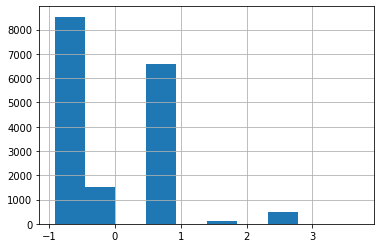

In [70]:
modelX3_train['floors'].hist()

In [71]:
modelX3_train['sqft_living']=np.log(modelX3_train['sqft_living'])
modelX3_test['sqft_living']=np.log(modelX3_test['sqft_living'])

/Users/sabirrahmanny/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [72]:
modelX3_train['floors']=np.log(modelX3_train['floors'])
modelX3_test['floors']=np.log(modelX3_test['floors'])

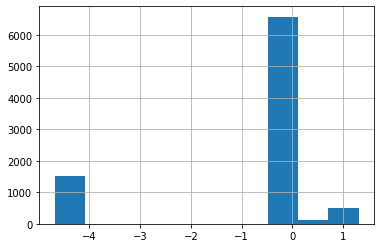

In [73]:
modelX3_train['floors'].hist()

In [74]:
modelX3_train['floors']=modelX3_train[(modelX3_train['floors'] >-3 )]
modelX3_test['floors']=modelX3_test[(modelX3_test['floors'] >-3 )]

In [75]:
len(modelX3_train['floors'])

17277

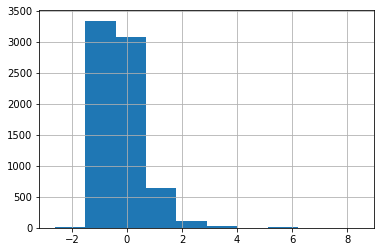

In [76]:
modelX3_train['floors'].hist()

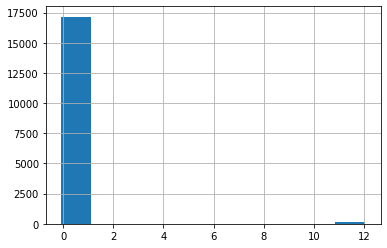

In [77]:
modelX3_train['waterfront'].hist()

In [78]:
modelX3_train['waterfront']=modelX3_train[(modelX3_train['floors'] <10 )]
modelX3_test['waterfront']=modelX3_test[(modelX3_test['floors'] <10 )]

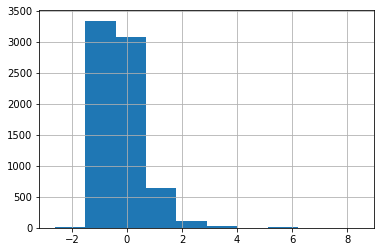

In [79]:
modelX3_train['waterfront'].hist()

In [80]:
modelX3_train['waterfront']=modelX3_train[(modelX3_train['floors'] <5.8 )]
modelX3_test['waterfront']=modelX3_test[(modelX3_test['floors'] <5.8 )]

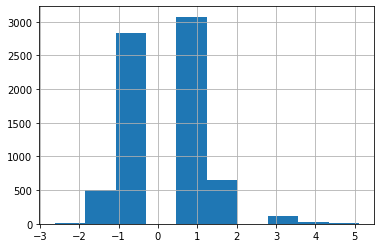

In [81]:
modelX3_train['waterfront'].hist()

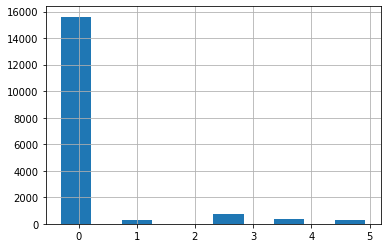

In [82]:
modelX3_train['view'].hist()

In [83]:
modelX3_train['view']=np.log(modelX3_train['view'])
modelX3_test['view']=np.log(modelX3_test['view'])

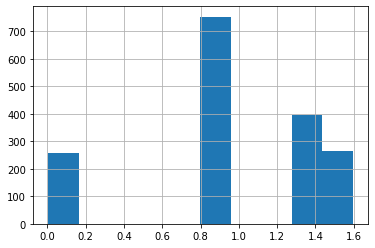

In [84]:
modelX3_train['view'].hist()

In [85]:
modelX3_train['view']=modelX3_train[(modelX3_train['view'] >.5 )]
modelX3_test['view']=modelX3_test[(modelX3_test['view'] >.5 )]

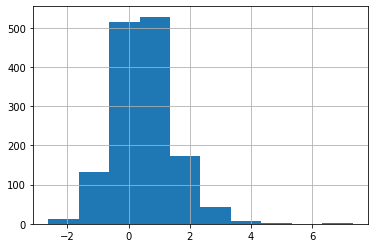

In [86]:
modelX3_train['view'].hist()

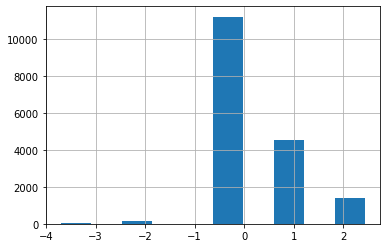

In [87]:
modelX3_train['condition'].hist()

In [88]:
modelX3_train['condition']=np.log(modelX3_train['condition'])
modelX3_test['condition']=np.log(modelX3_test['condition'])

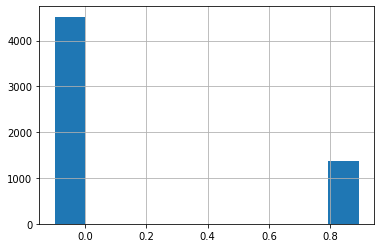

In [89]:
modelX3_train['condition'].hist()

In [90]:
modelX3_train['condition']=modelX3_train[(modelX3_train['condition'] >.7 )]
modelX3_test['condition']=modelX3_test[(modelX3_test['condition'] >.7 )]

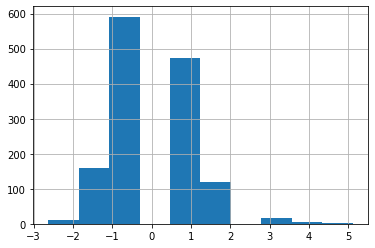

In [91]:
modelX3_train['condition'].hist()

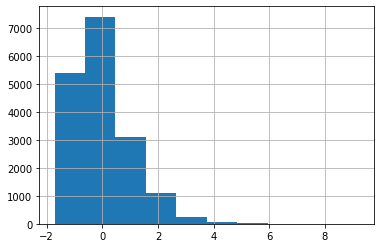

In [92]:
modelX3_train['sqft_above'].hist()

In [93]:
modelX3_train['sqft_above']=np.log(modelX3_train['sqft_above'])
modelX3_test['sqft_above']=np.log(modelX3_test['sqft_above'])

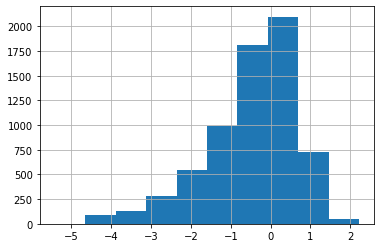

In [94]:
modelX3_train['sqft_above'].hist()

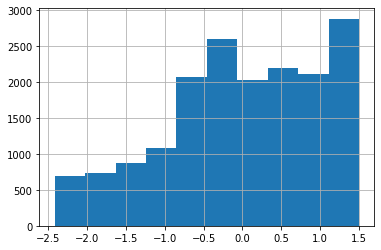

In [95]:
modelX3_train['yr_built'].hist()

In [96]:
modelX3_train['yr_built']=np.log(modelX3_train['yr_built'])
modelX3_test['yr_built']=np.log(modelX3_test['yr_built'])

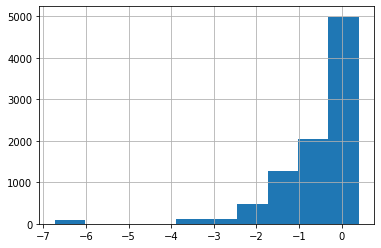

In [97]:
modelX3_train['yr_built'].hist()

In [98]:
modelX3_train['yr_built']=modelX3_train[(modelX3_train['yr_built']>-5 )]
modelX3_test['yr_built']=modelX3_test[(modelX3_test['yr_built']>-5 )]

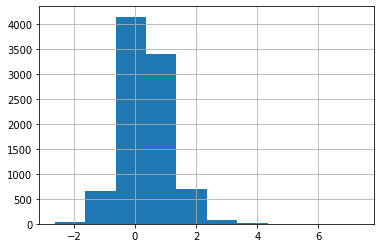

In [99]:
modelX3_train['yr_built'].hist()

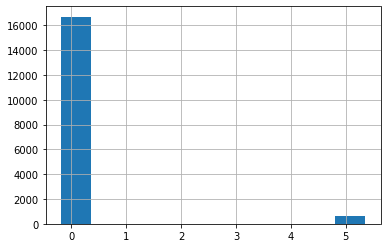

In [100]:
modelX3_train['yr_renovated'].hist()

In [101]:
modelX3_train['yr_renovated']=np.log(modelX3_train['yr_renovated'])
modelX3_test['yr_renovated']=np.log(modelX3_test['yr_renovated'])

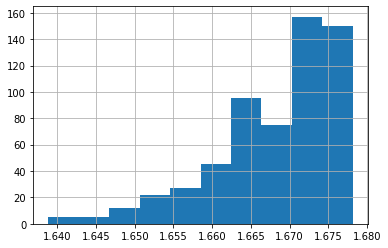

In [102]:
modelX3_train['yr_renovated'].hist()

In [103]:
modelX3_train['yr_renovated']=modelX3_train[(modelX3_train['yr_renovated']<1640 )]
modelX3_test['yr_renovated']=modelX3_test[(modelX3_test['yr_renovated']<1640 )]

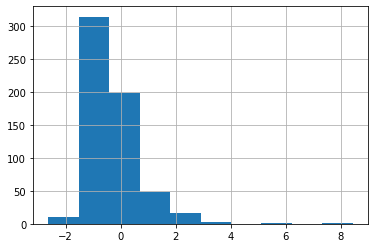

In [104]:
modelX3_train['yr_renovated'].hist()

In [105]:
modelX3_train['yr_renovated']=modelX3_train[(modelX3_train['yr_renovated']<8 )]
modelX3_test['yr_renovated']=modelX3_test[(modelX3_test['yr_renovated']<8 )]

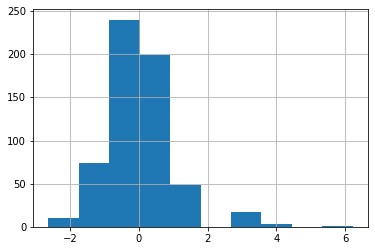

In [106]:
modelX3_train['yr_renovated'].hist()

In [107]:
modelX3_train['yr_renovated']=modelX3_train[(modelX3_train['yr_renovated']<3 )]
modelX3_test['yr_renovated']=modelX3_test[(modelX3_test['yr_renovated']<3 )]

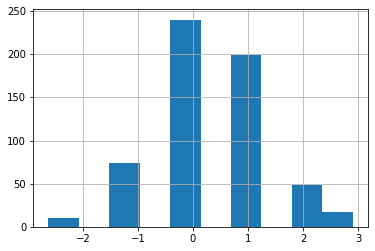

In [108]:
modelX3_train['yr_renovated'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c53c510>,
      dtype=object)

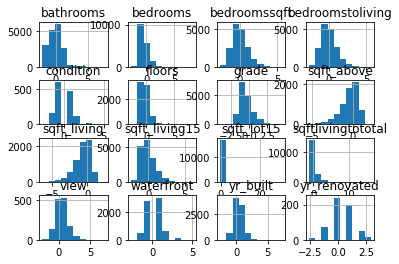

In [109]:
modelX3_train.hist()

In [110]:
modelX3_train['sqft_lot15']=np.log(modelX3_train['sqft_lot15'])
modelX3_test['sqft_lot15']=np.log(modelX3_test['sqft_lot15'])

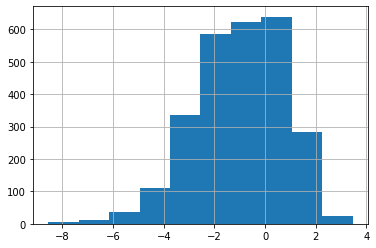

In [111]:
modelX3_train['sqft_lot15'].hist()

In [112]:
modelX3_train['sqftlivingtototal']=np.log(modelX3_train['sqftlivingtototal'])
modelX3_test['sqftlivingtototal']=np.log(modelX3_test['sqftlivingtototal'])

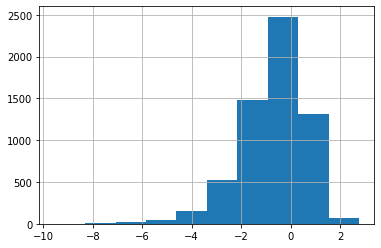

In [113]:
modelX3_train['sqftlivingtototal'].hist()

In [114]:
modelX3_train.isna().sum()

bedrooms                 0
bathrooms                0
sqft_living           9924
floors               10064
waterfront           10070
view                 15866
condition            15902
grade                    0
sqft_above           10558
yr_built              8261
yr_renovated         16689
sqft_living15            0
sqft_lot15           14626
bedroomssqft             0
sqftlivingtototal    11174
bedroomstoliving         0
dtype: int64

Filled the null values with the mean

In [115]:
modelX3_train['sqft_living'].fillna((modelX3_train['sqft_living'].mean()), inplace=True)
modelX3_train['floors'].fillna((modelX3_train['floors'].mean()), inplace=True)
modelX3_train['waterfront'].fillna((modelX3_train['waterfront'].mean()), inplace=True)
modelX3_train['view'].fillna((modelX3_train['view'].mean()), inplace=True)
modelX3_train['condition'].fillna((modelX3_train['condition'].mean()), inplace=True)
modelX3_train['sqft_above'].fillna((modelX3_train['sqft_above'].mean()), inplace=True)
modelX3_train['yr_built'].fillna((modelX3_train['yr_built'].mean()), inplace=True)
modelX3_train['yr_renovated'].fillna((modelX3_train['yr_renovated'].mean()), inplace=True)
modelX3_train['sqft_lot15'].fillna((modelX3_train['sqft_lot15'].mean()), inplace=True)
modelX3_train['sqftlivingtototal'].fillna((modelX3_train['sqftlivingtototal'].mean()), inplace=True)

In [116]:
lr.fit(modelX3_train, modely3_train)
print(lr.score(modelX3_train, modely3_train))

0.5150077200832754


In [117]:
Y = 'price'
pred_sum_3 = '+'.join(modelX3_train.columns)
formula_3 = Y + '~' + pred_sum_3
Training_3=modelX3_train.join(modely3_train)

In [118]:
mod = smf.ols(formula=formula_3, data = Training_3)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        09:23:16   Log-Likelihood:            -2.3973e+05
No. Observations:               17277   AIC:                         4.795e+05
Df Residuals:                   17261   BIC:                         4.796e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.318e+05   4897.532    108.593      0.000    5.22e+05    5.41e+05
bedrooms          -1.058e+04   3621.497     -2.920      0.004   -1.77e+04   -3477.636
bathrooms          2.807e+04   3223.008      8.709      0.000    2.18e+04    3.44e+04
sqft_living        5.916e+04   2832.571     20.886      0.000    5.36e+04    6.47e+04
floors             5.449e+04   1.63e+04      3.342      0.001    2.25e+04    8.64e+04
waterfront         4989.5751   1.69e+04      0.295      0.768   -2.81e+04    3.81e+04
view               4.445e+04   6626.207      6.709      0.000    3.15e+04    5.74e+04
condition          5.409e+04   7307.194      7.402      0.000    3.98e+04    6.84e+04
grade              1.463e+05   3325.473     43.991      0.000     1.4e+05    1.53e+05
sqft_above         1.422e+04   3018.626      4.712      0.000    8307.843    2.01e+04
yr_built          -9370.8238   5100.349     -1.837      0.066   -1.94e+04     626.378
yr_renovated       7.313e+04   1.04e+04      7.050      0.000    5.28e+04    9.35e+04
sqft_living15      4.994e+04   3169.343     15.756      0.000    4.37e+04    5.61e+04
sqft_lot15        -2.129e+04   2853.294     -7.460      0.000   -2.69e+04   -1.57e+04
bedroomssqft      -1.722e+04   1535.143    -11.220      0.000   -2.02e+04   -1.42e+04
sqftlivingtototal  3256.6963   2561.406      1.271      0.204   -1763.920    8277.313
bedroomstoliving  -1.722e+04   1535.143    -11.220      0.000   -2.02e+04   -1.42e+04
==============================================================================
Omnibus:                    14355.902   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1055769.000
Skew:                           3.540   Prob(JB):                         0.00
Kurtosis:                      40.636   Cond. No.                     6.85e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.49e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""